Sahib Athwal\
A13450589\
COGS 118A: Final\
Professor Fleischer






# **Experiment Overview**

This section will run through each of the respective supervised machine learning algorithms that include: Decision Tree, Random Forests, and KNN Models. The results will be displayed for each of the respective datasets we are running our algorithms on. The implementation of each of the supervised machine learning techniques will utilize python libraries stated below in our implementation.

#### **Import Libraries**

In [1]:
# Here are the respective established python libraries
# we will be utilizing in order to make our supervised
# machine learning algorithms.

import scipy.io as sio
from scipy import stats
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import seaborn as sns

## **Classifier Functions**

#### **Heat Map Visualiztion**

This is the helper method that allows us to view each of our respective classifiers as a heat map.

In [2]:
global count 
count = 0
def draw_heatmap(acc, acc_desc, C_list, character):
    global count
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=C_list, 
                     xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$'  + character + '$')
    plt.title(acc_desc + ' w.r.t $' + character + '$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()
    count+=1

#### **Linear Support Vector Machine Classifier**

This is the helper method that allows us to run the SVM algorithm on our dataset. Initially, we used RBF, but we found it was faster to work with linear in our trials as this method took the longest. Inside the method, we optimize the hyper parameters using the grid search that utilizes K 5 Folds method. Then, it proceeds to go on and train and test with the best parameters.

In [3]:
def svm_func():
    #SVM binary classification used linear instead of RBF (Faster runtime)
    classifier = svm.SVC(kernel = 'linear')

    # Different C values to try
    C_list     = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1] 
    parameters = {'C': C_list}

    #Perform a grid Search to identify the best C and to perform K 5 Folds
    clf = GridSearchCV(classifier, parameters, return_train_score = 'true', 
                       cv=5)
    #Have to fit the classifier with the training data
    clf.fit(X_train_val, Y_train_val)

    #Extract the training and validation accuracies and plot them as heat maps 
    #to visualize the best C parameter
    train_acc = clf.cv_results_['mean_train_score']
    draw_heatmap(train_acc.reshape(-1,1), 'train accuracy', C_list, 'C')

    val_acc = clf.cv_results_['mean_test_score']
    draw_heatmap(val_acc.reshape(-1,1), 'val accuracy', C_list, 'C')

    #Find the optimal C parameter and use that to redefine the classifier
    optimal_classifier = svm.SVC(kernel = 'linear', C = clf.best_params_['C'] )
    
    for i,j in enumerate(C_list):
        if j == clf.best_params_['C']:
            best_train_acc = train_acc[i]
            
    #Find test accuracy
    optimal_classifier.fit(X_train_val, Y_train_val)
    test_acc = optimal_classifier.score(X_test, Y_test)
    return test_acc, best_train_acc, clf.best_params_['C']

#### **Decision Tree Classifier**

This is the helper method that allows us to run the Decision Tree algorithm on our dataset. Inside the method, we optimize the hyper parameters using the grid search that utilizes K 5 Folds method. Then, it proceeds to go on and train and test with the best parameters.

In [4]:
def decision_Tree():
    D_list = np.array([1, 2, 3, 4, 5])
    parameters = {'max_depth':D_list}

    classifier_grid = GridSearchCV(DecisionTreeClassifier(criterion="entropy"), 
                                   parameters, cv=5, return_train_score=True)
    
    #Have to fit the classifier with the training data
    classifier_grid.fit(X_train_val, Y_train_val)

    #Show the heatmaps
    draw_heatmap(classifier_grid.cv_results_['mean_train_score'].reshape(5,1), 
                 'DT train accuracy', D_list, 'D')
    draw_heatmap(classifier_grid.cv_results_['mean_test_score'].reshape(5,1), 
                 'DT val accuracy', D_list, 'D')
    
    #Train and Test with best parameters
    D_star = classifier_grid.best_params_['max_depth']
    classifier_test = DecisionTreeClassifier(max_depth=D_star, 
                                             criterion="entropy")
    classifier_test.fit(X_train_val, Y_train_val)
    Desicion_test_acc = classifier_test.score(X_test,Y_test_val)
    
    train_acc = classifier_grid.cv_results_['mean_train_score']
    
    for i,j in enumerate(D_list):
        if j == D_star:
            best_train_acc = train_acc[i]
    
    return Desicion_test_acc, best_train_acc, D_star

#### **Random Forest Classifier**

This is the helper method that allows us to run the Random Forest algorithm on our dataset. Inside the method, we optimize the hyper parameters using the grid search that utilizes K 5 Folds method. Then, it proceeds to go on and train and test with the best parameters.

In [5]:
def rand_Forest():
    D_list = np.array([1, 2, 3, 4, 5])
    parameters = {'max_depth':D_list}

    #Tried various parameters on the docs this got me the fastest result using
    #K5 Folds specified
    classifier_grid = GridSearchCV(RandomForestClassifier(criterion="entropy"), 
                                   parameters, cv=5, return_train_score=True)
    classifier_grid.fit(X_train_val, Y_train_val)

    #Show Heatmaps
    draw_heatmap(classifier_grid.cv_results_['mean_train_score'].reshape(5,1), 
                 'RF train accuracy', D_list, 'K')
    draw_heatmap(classifier_grid.cv_results_['mean_test_score'].reshape(5,1), 
                 'RF val accuracy', D_list, 'K')

    #Train and Test with best parameters
    D_star = classifier_grid.best_params_['max_depth']

    #Entropy worked better than the default gini
    classifier_test1 = RandomForestClassifier(max_depth=D_star, 
                                              criterion="entropy")
    classifier_test1.fit(X_train_val, Y_train_val)
    randForest_acc = classifier_test1.score(X_test,Y_test_val)
    
    
    train_acc = classifier_grid.cv_results_['mean_train_score']
    for i,j in enumerate(D_list):
        if j == D_star:
            best_train_acc = train_acc[i]
    
    return randForest_acc, best_train_acc, D_star

#### **KNN Classifier**

This is the helper method that allows us to run the KNN algorithm on our
dataset. Inside the method, we optimize the hyper parameters using the grid search that utilizes K 5 Folds method. Then, it proceeds to go on and train and test with the best parameters.

In [6]:

def knn_classifier():
    k_list = np.array([1, 2, 3, 4, 5, 6])
    parameters = {'n_neighbors':k_list}
    classifier_grid = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, 
                                   return_train_score=True)
    classifier_grid.fit(X_train_val, Y_train_val)

    #Plot heatmaps for the Training and Testing scores respectively
    draw_heatmap(classifier_grid.cv_results_['mean_train_score'].reshape(6,1), 
                 'KNN train accuracy', k_list, 'K')
    draw_heatmap(classifier_grid.cv_results_['mean_test_score'].reshape(6,1), 
                 'KNN val accuracy', k_list, 'K')

    #Train and Test with best parameters
    k_star = classifier_grid.best_params_['n_neighbors']
    classifier_test2 = KNeighborsClassifier(n_neighbors=k_star)
    classifier_test2.fit(X_train_val,Y_train_val)
    knn_acc = classifier_test2.score(X_test,Y_test_val)
    
    train_acc = classifier_grid.cv_results_['mean_train_score']
    for i,j in enumerate(k_list):
        if j == k_star:
            best_train_acc = train_acc[i]
    
    return knn_acc, best_train_acc, k_star

## **Bankruptcy Dataset**

This given dataset provides 96 various attributes that give us the necessary information to predict whether a company will go bankrupt or not. The reasoning behind using this dataset is for a basis for a real
world scenario, where a company may exhibit similarities to these features and may need to take decisive action if they are going to become bankrupt.


### **Cleaning Bankruptcy Dataset**

In [7]:
bankrupcy_data_preserved = pd.read_csv('Bankrupcy.csv')
bankrupcy_data = bankrupcy_data_preserved #Temp for manipulation
bankrupcy_data #preview of dataset

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,...,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,...,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,2.394682e-02,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,2.550000e+07,0.458521,7.900790e-04,0.000000,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0

In [8]:
bankrupcy_data.dropna(inplace=True)
bankrupcy_data.shape
bankrupcy_data.head()

#Dropped some of the columns deemed as insignificant in comparison
#to those that remain. (Based off of Research of Important Aspects of Companies)

bankrupcy_data = bankrupcy_data.iloc[:,0:20]
bankrupcy_data = bankrupcy_data.drop(labels=[" ROA(C) before interest and depreciation before interest"],axis=1)
bankrupcy_data = bankrupcy_data.drop(labels=[" Pre-tax net Interest Rate"],axis=1)
bankrupcy_data = bankrupcy_data.drop(labels=[" After-tax net Interest Rate"],axis=1)
bankrupcy_data = bankrupcy_data.drop(labels=[" Non-industry income and expenditure/revenue"],axis=1)
bankrupcy_data = bankrupcy_data.drop(labels=[" Continuous interest rate (after tax)"],axis=1)
bankrupcy_data = bankrupcy_data.drop(labels=[" Interest-bearing debt interest rate"],axis=1)
bankrupcy_data = bankrupcy_data.drop(labels=[" Persistent EPS in the Last Four Seasons"],axis=1)

#Checking what data types we have in the dataset
print(bankrupcy_data.dtypes)
bankrupcy_data.head()#Data preview
#Convert Data to a numpy Array
bankrupcy_data = bankrupcy_data.sample(n=5000).reset_index(drop=True)

print(bankrupcy_data[0:5])#Preview
bankrupcy_data

Bankrupt?                                               int64
 ROA(A) before interest and % after tax               float64
 ROA(B) before interest and depreciation after tax    float64
 Operating Gross Margin                               float64
 Realized Sales Gross Margin                          float64
 Operating Profit Rate                                float64
 Operating Expense Rate                               float64
 Research and development expense rate                float64
 Cash flow rate                                       float64
 Tax rate (A)                                         float64
 Net Value Per Share (B)                              float64
 Net Value Per Share (A)                              float64
 Net Value Per Share (C)                              float64
dtype: object
   Bankrupt?  ...   Net Value Per Share (C)
0          0  ...                  0.192954
1          0  ...                  0.197842
2          0  ...                  0.168261
3   

,Bankrupt?,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Operating Expense Rate,Research and development expense rate,Cash flow rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C)
0,0,0.595181,0.561647,0.603756,0.603756,0.998997,1.351791e-04,0.000000e+00,0.475932,0.186355,0.192954,0.192954,0.192954
1,0,0.552061,0.542963,0.649195,0.649195,0.999324,5.364377e-04,0.000000e+00,0.461297,0.262780,0.197842,0.197842,0.197842
2,0,0.713476,0.740404,0.639639,0.639639,0.999313,3.946674e-04,4.813415e-04,0.501301,0.094949,0.168261,0.168261,0.168261
3,0,0.573757,0.550137,0.607439,0.607439,0.999043,1.474365e-04,4.020000e+09,0.469154,0.215406,0.193460,0.193460,0.193460
4,0,0.565198,0.606456,0.614120,0.614120,0.999105,1.933442e-04,9.170000e+09,0.474006,0.098795,0.179976,0.179976,0.179976
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0.544974,0.527009,0.596131,0.596131,0.998978,3.150000e+09,1.190000e+08,0.463749,0.265918,0.185159,0.185159,0.185159
4996,0,0.526766,0.515070,0.605933,0.605875,0.998982,1.839777e-04,0.000000e+00,0.460946,0.000000,0.171042,0.171042,0.171042
4997,0,0.534507,0.494084,0.610631,0.610891,0.998959,2.870098e-04,2.144389e-04,0.465887,0.094645,0.176773,0.176773,0.176773
4998,0,0.552933,0.541357,0.608224,0.608224,0.999078,1.253500e-04,0.000000e+00,0.465093,0.192935,0.215457,0.215457,0.215457


Partition:  0.8


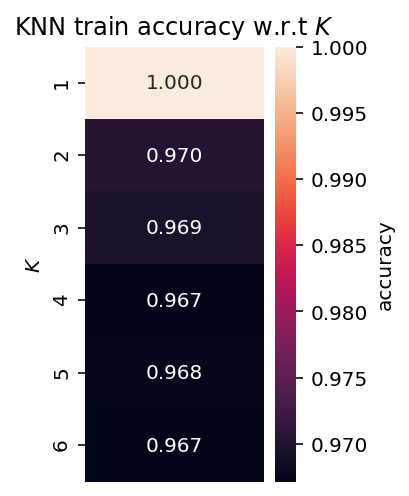

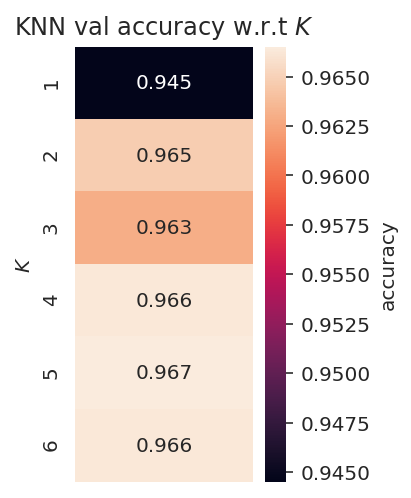

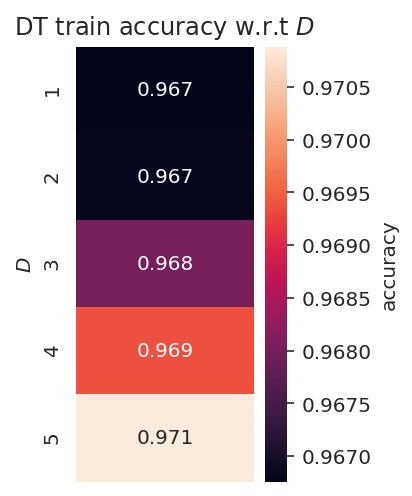

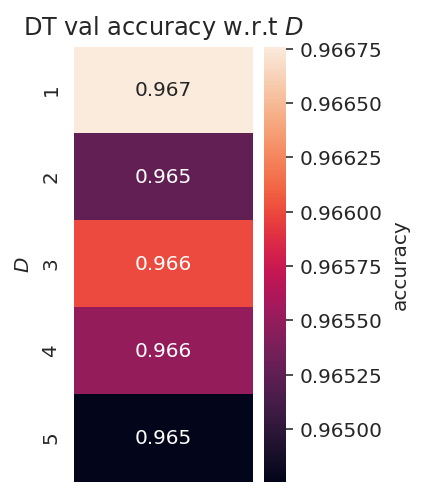

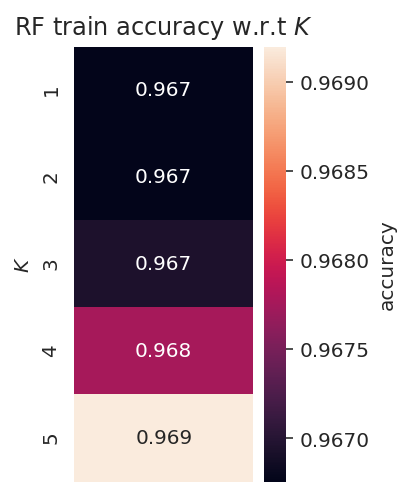

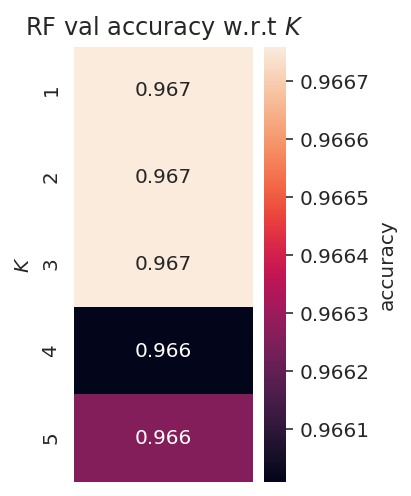

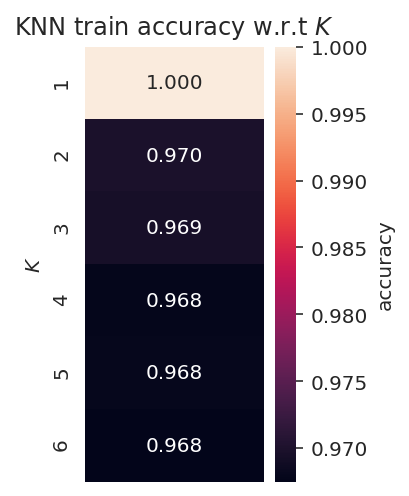

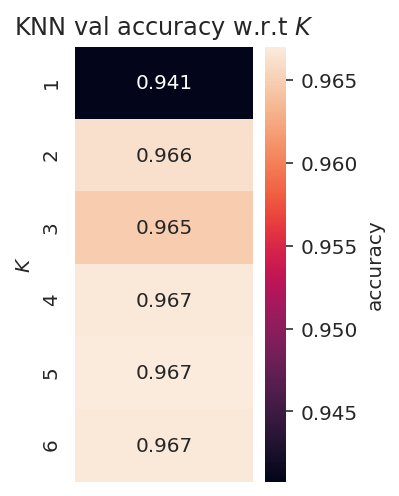

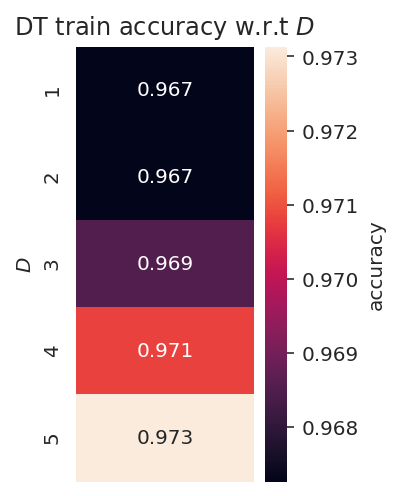

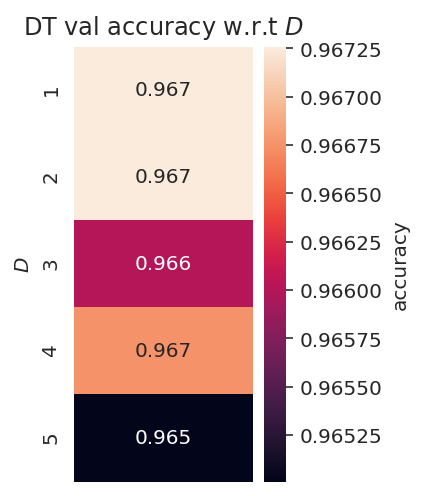

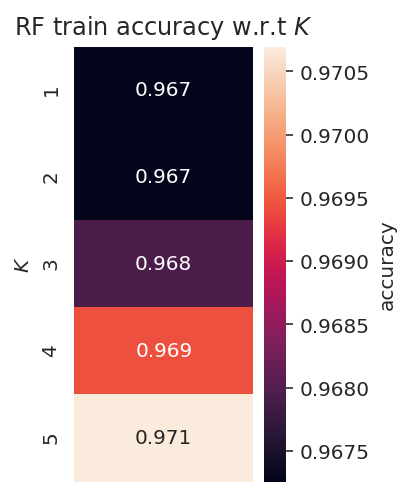

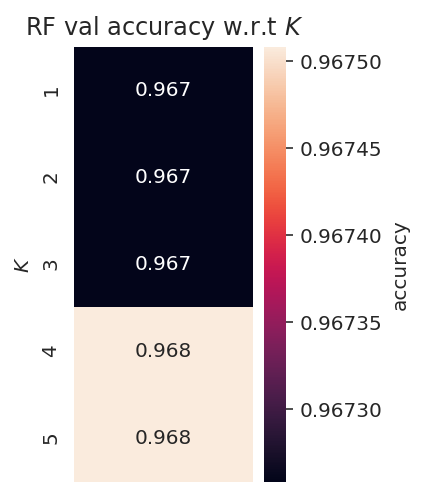

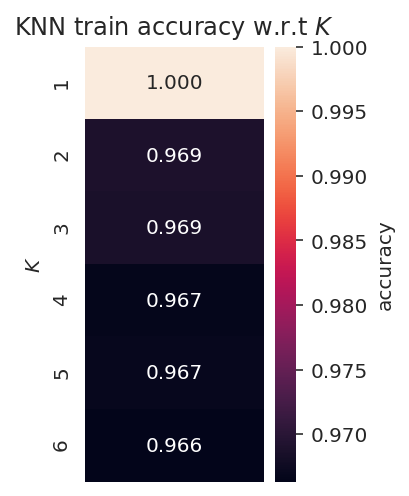

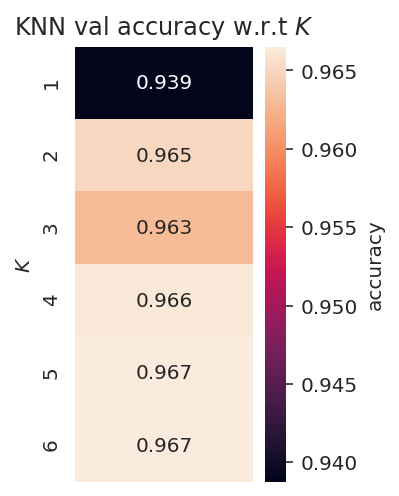

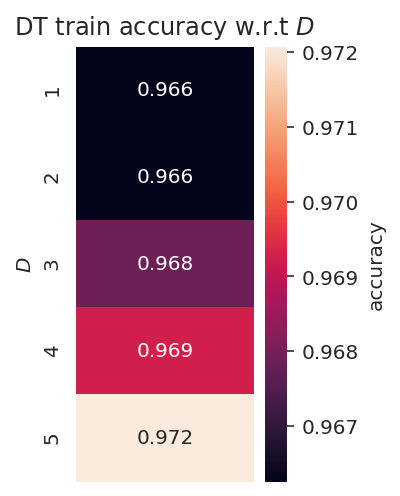

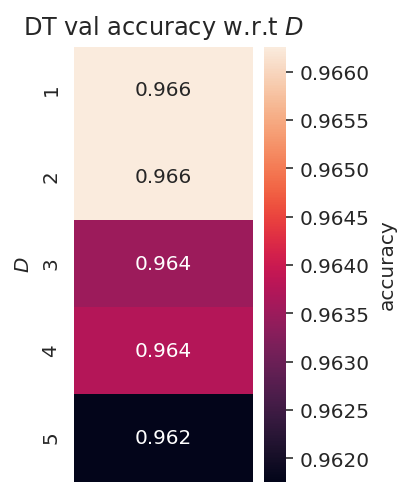

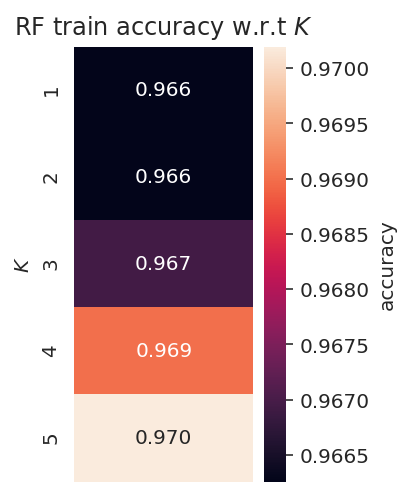

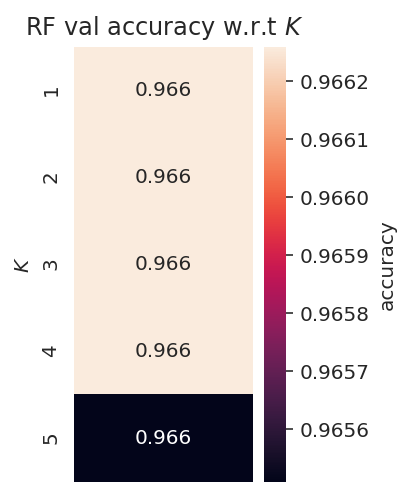

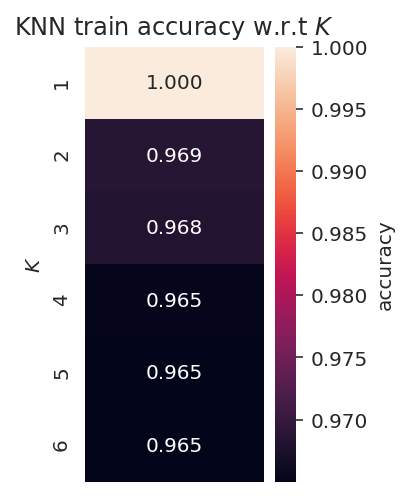

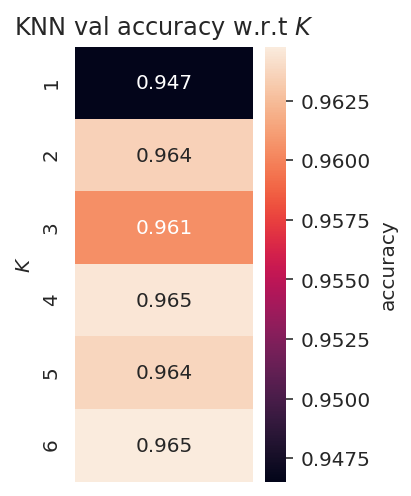

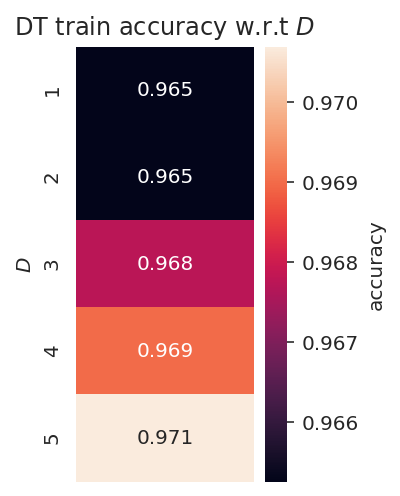

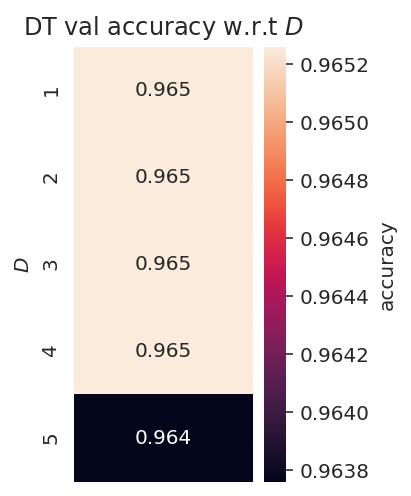

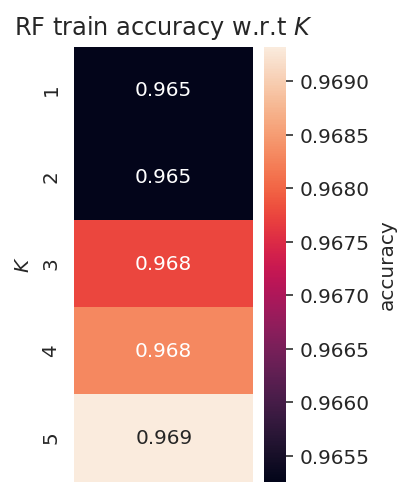

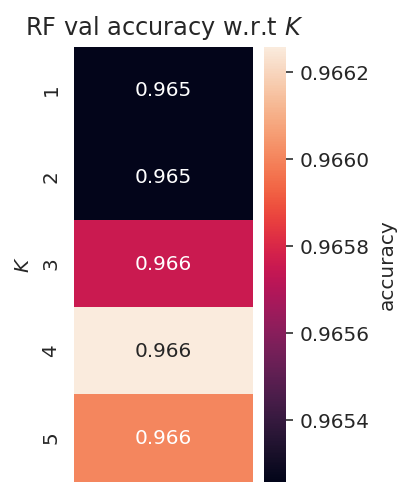

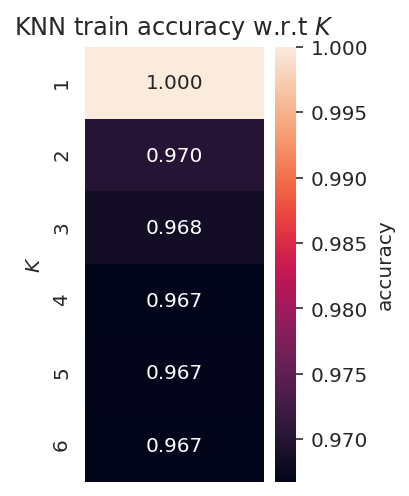

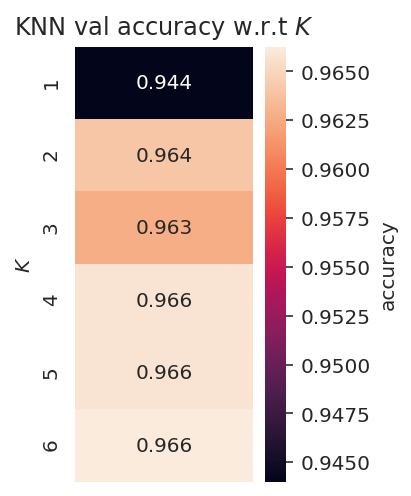

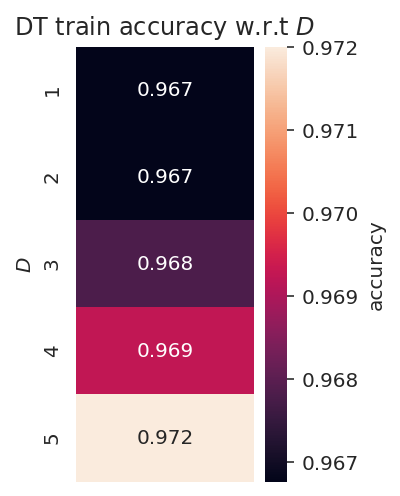

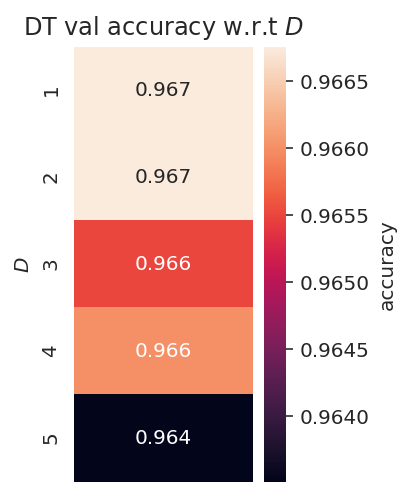

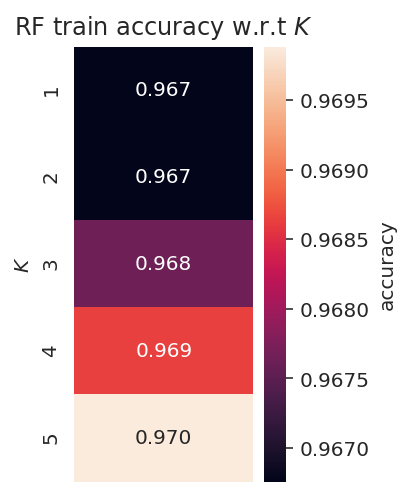

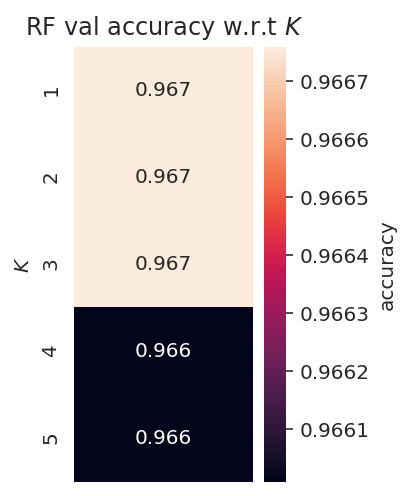

Test Accuracy Average for knn =  0.9677999999999999
Test Accuracy Average for Random Forest =  0.9667999999999999
Test Accuracy Average for Decision Tree =  0.9681999999999998
[[0.     0.9678 0.9682 0.9668 0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.    ]]
############################
[[0.         0.96675832 0.96675832 0.96675832 0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]]
############################
[[0. 6. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
Partition:  0.5


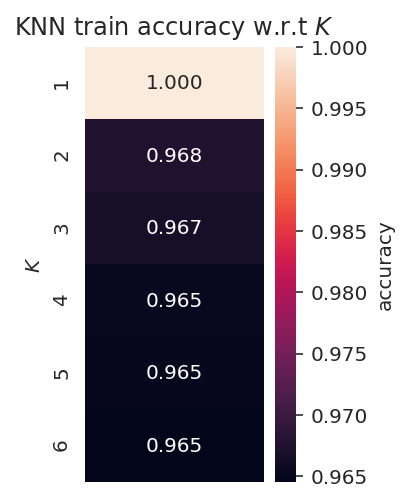

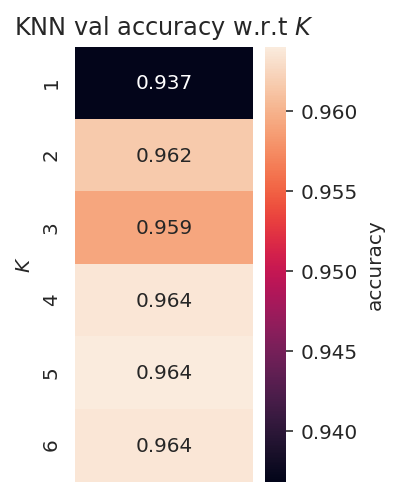

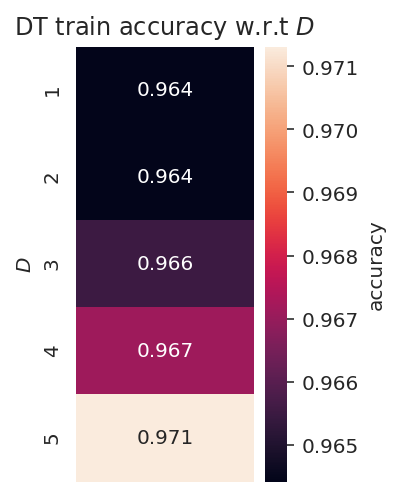

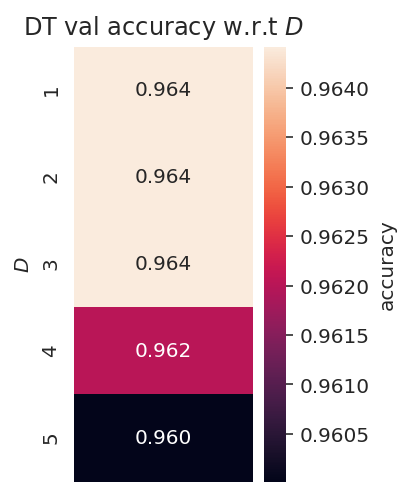

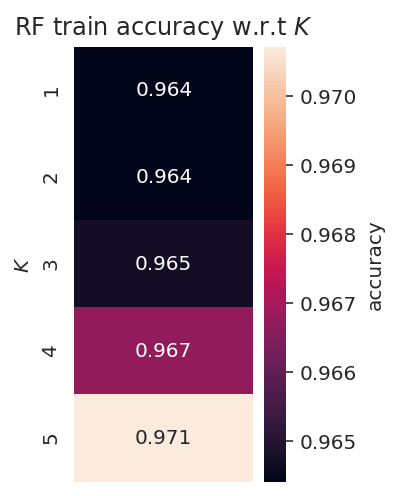

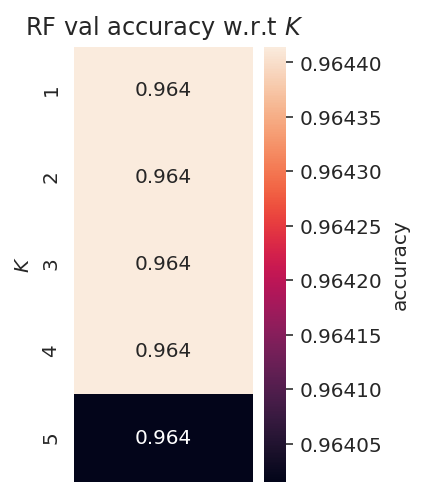

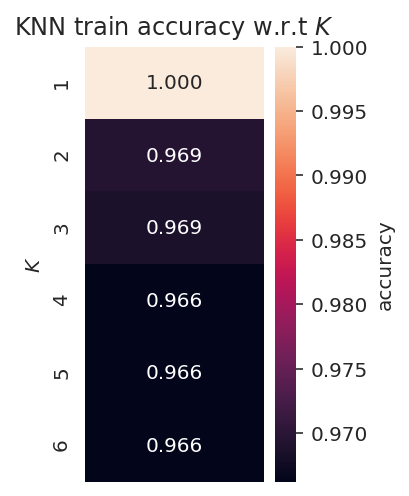

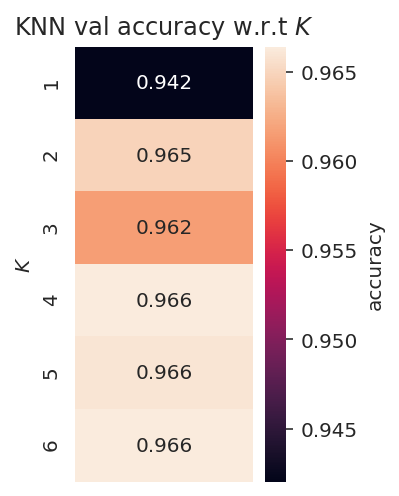

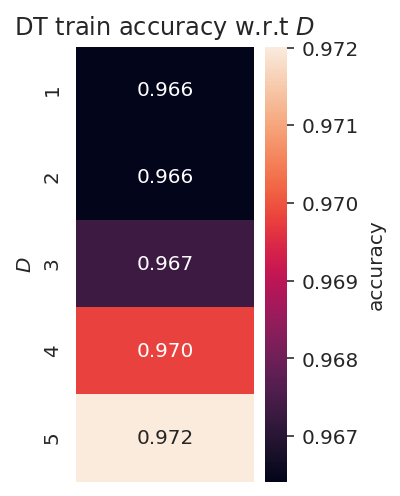

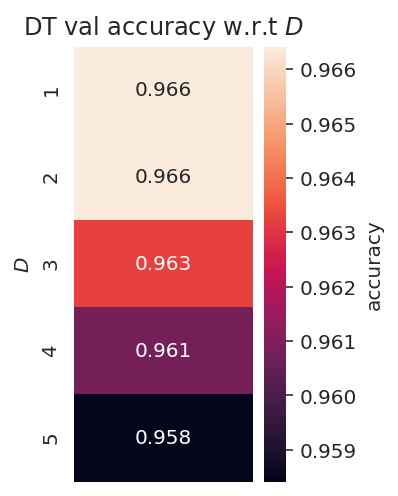

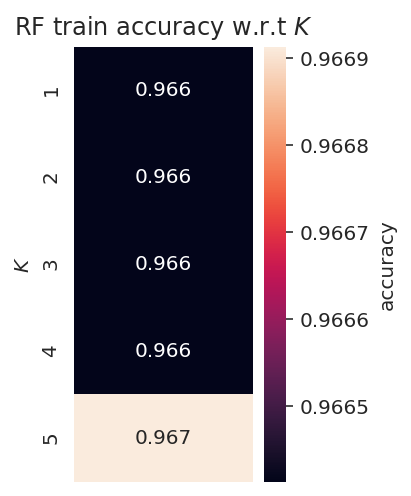

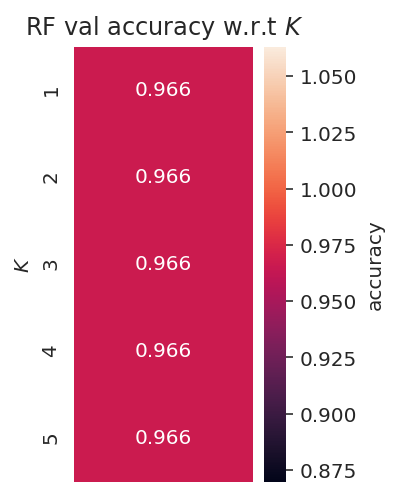

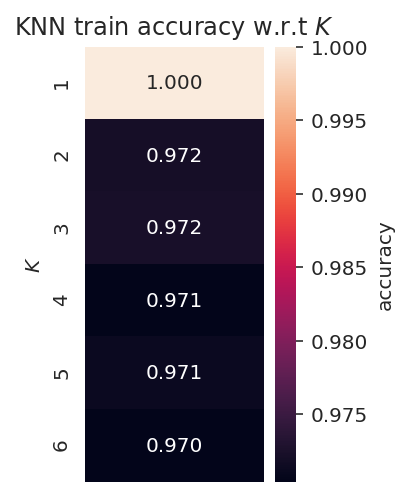

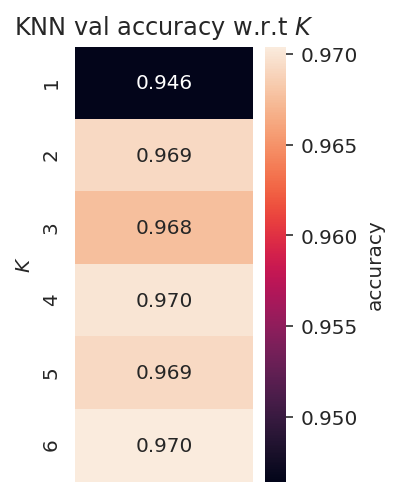

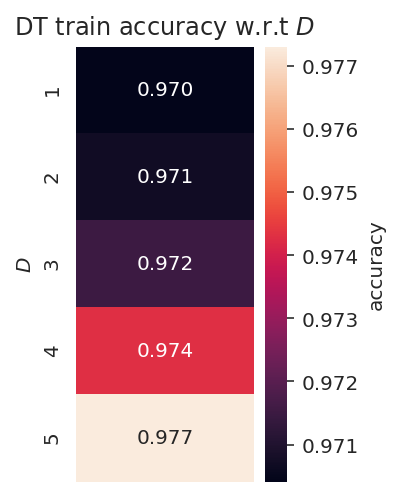

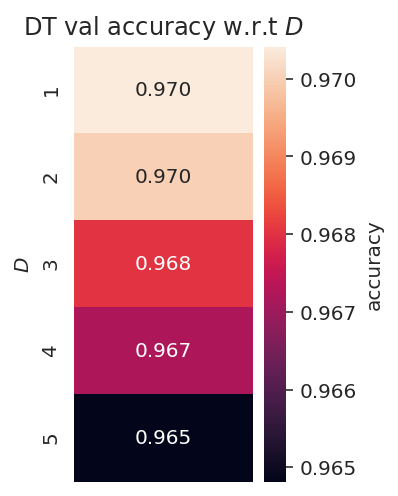

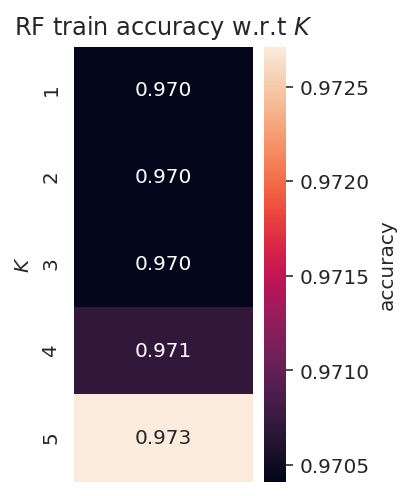

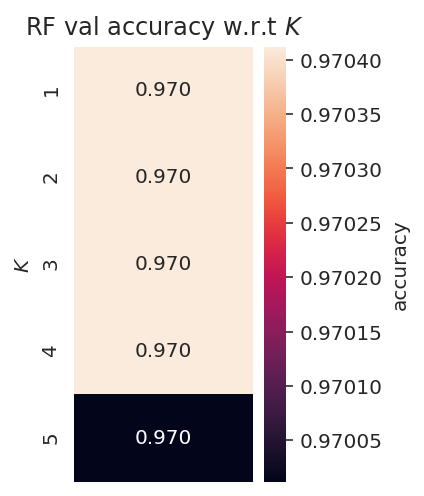

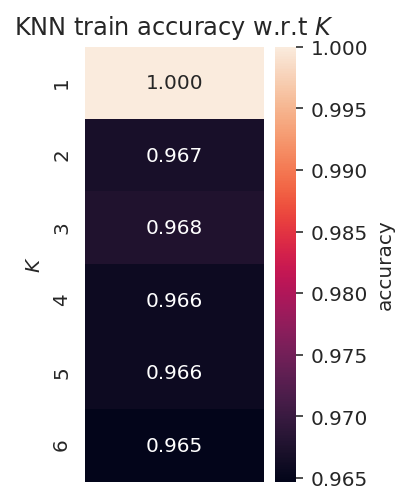

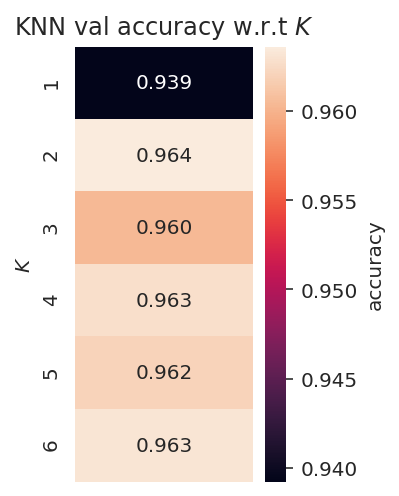

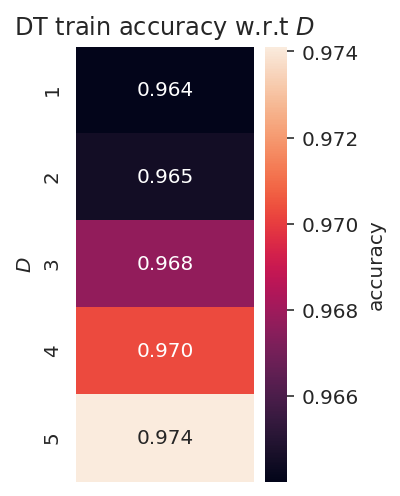

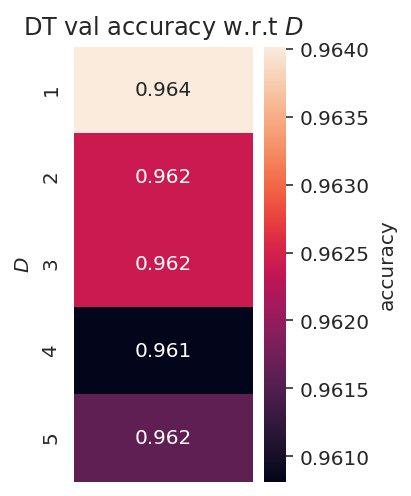

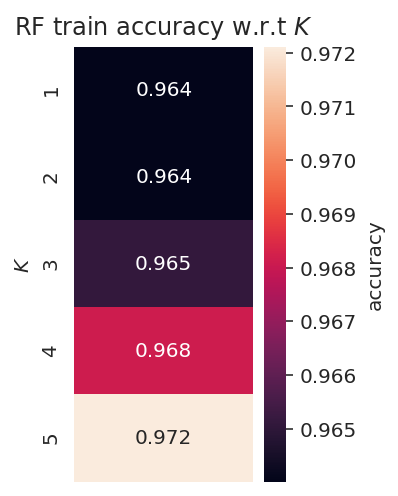

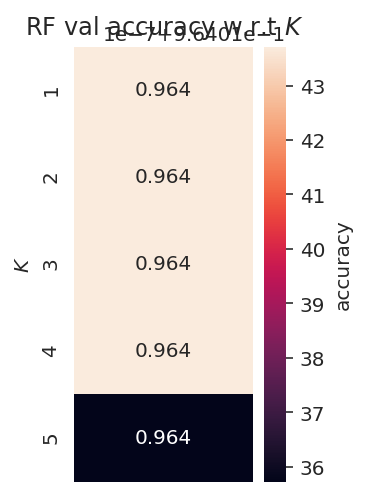

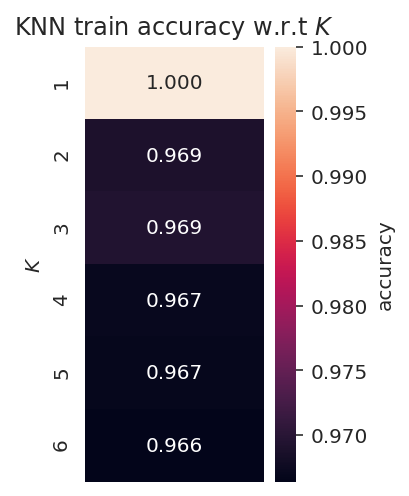

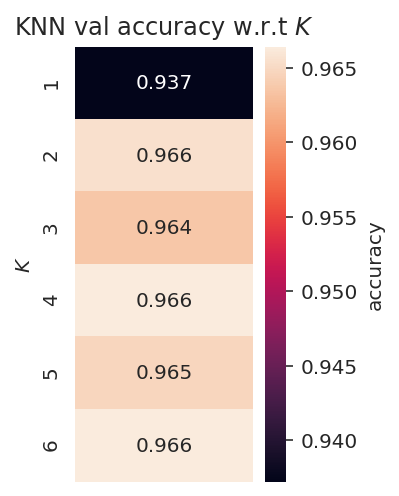

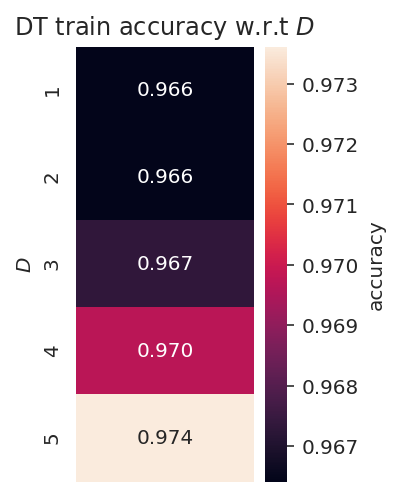

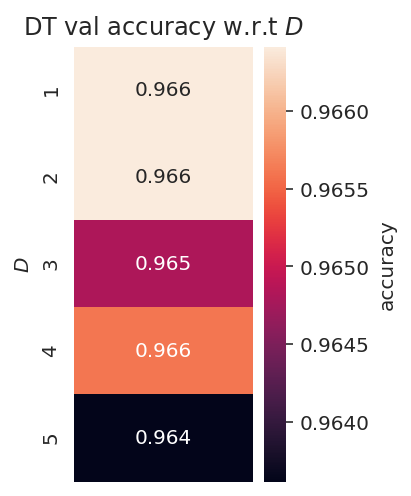

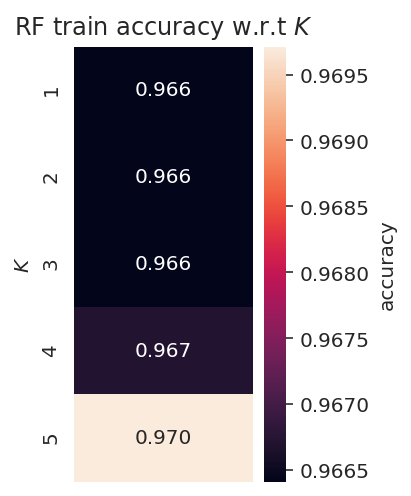

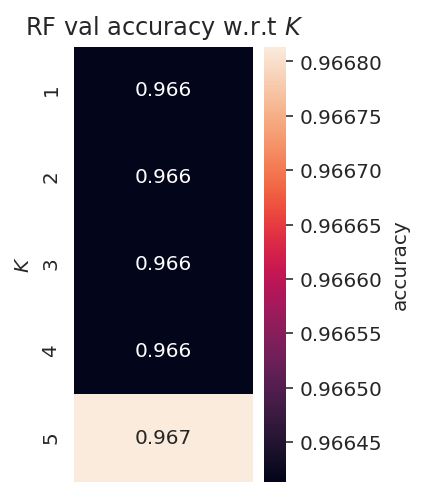

Test Accuracy Average for knn =  0.9667199999999999
Test Accuracy Average for Random Forest =  0.9674400000000001
Test Accuracy Average for Decision Tree =  0.96728
[[0.      0.9678  0.9682  0.9668  0.      0.      0.     ]
 [0.      0.96672 0.96728 0.96744 0.      0.      0.     ]
 [0.      0.      0.      0.      0.      0.      0.     ]]
############################
[[0.         0.96675832 0.96675832 0.96675832 0.         0.
  0.        ]
 [0.         0.96711309 0.96641344 0.96971194 0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]]
############################
[[0. 6. 1. 1. 0. 0. 0.]
 [0. 4. 1. 5. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
Partition:  0.2


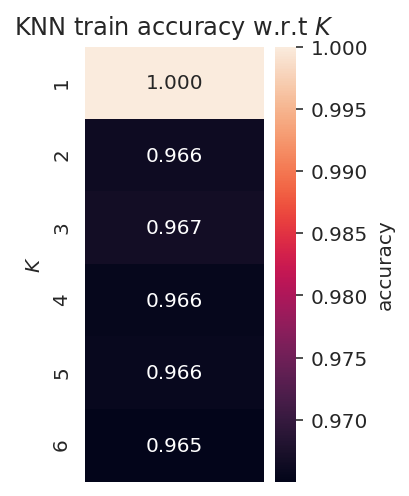

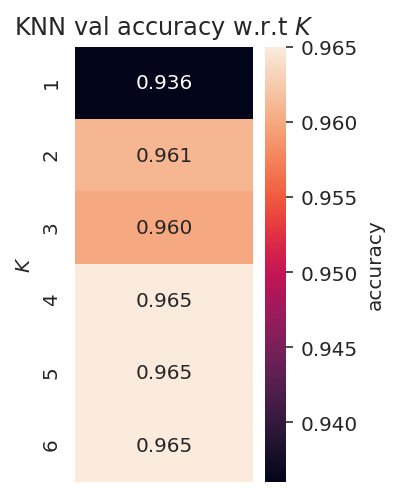

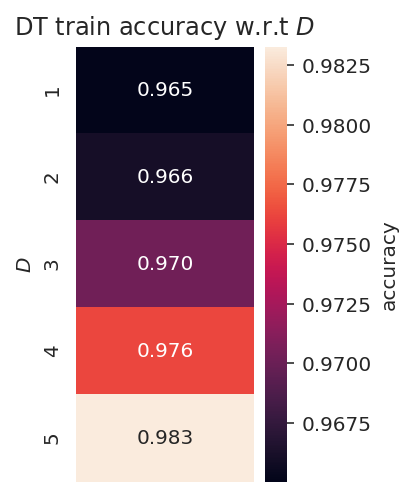

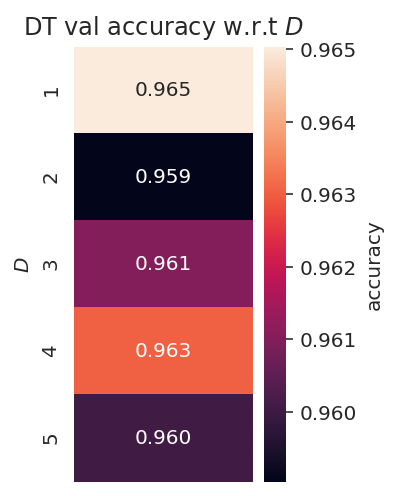

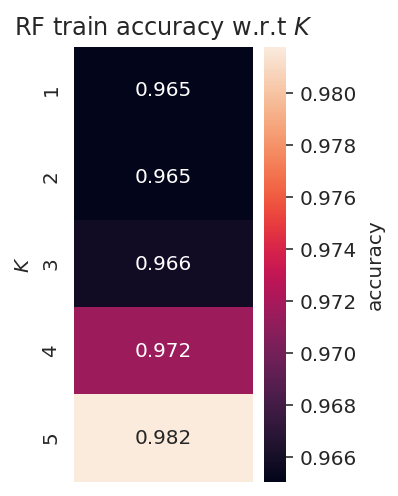

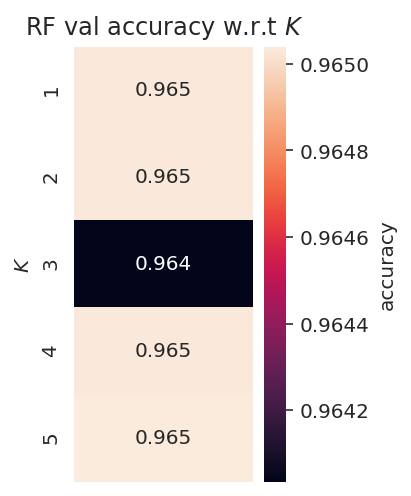

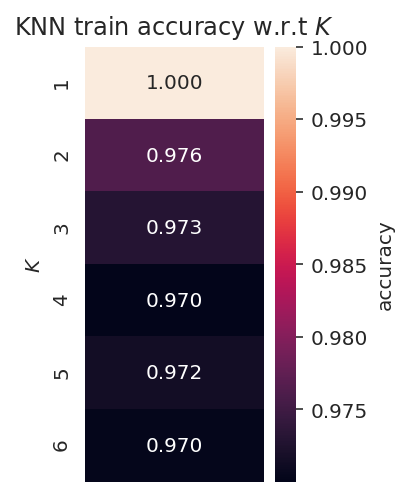

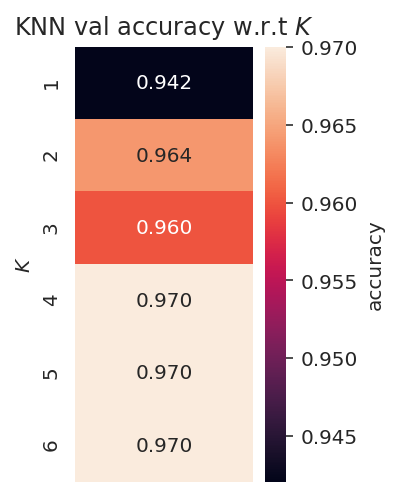

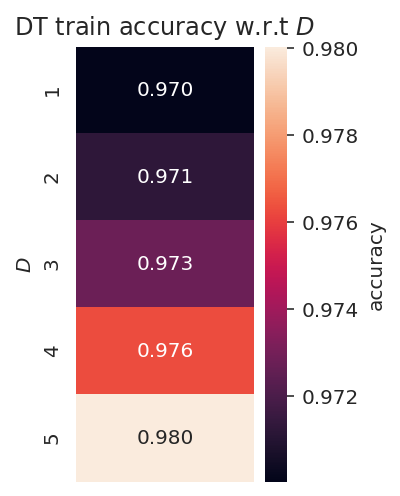

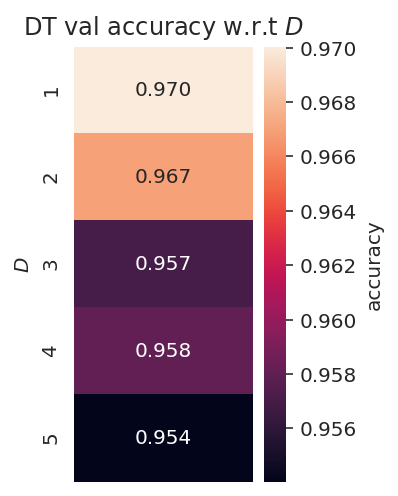

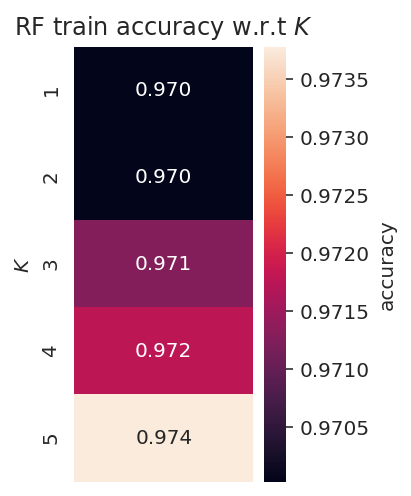

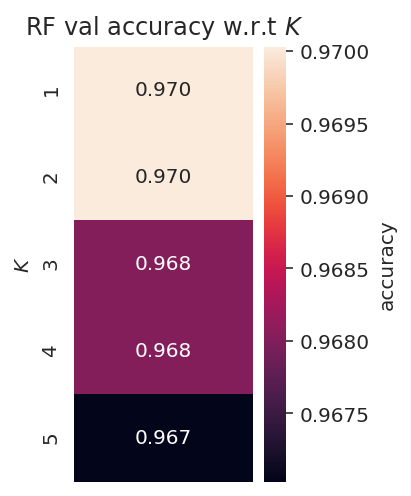

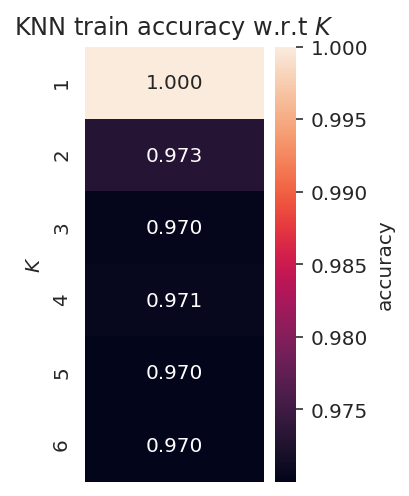

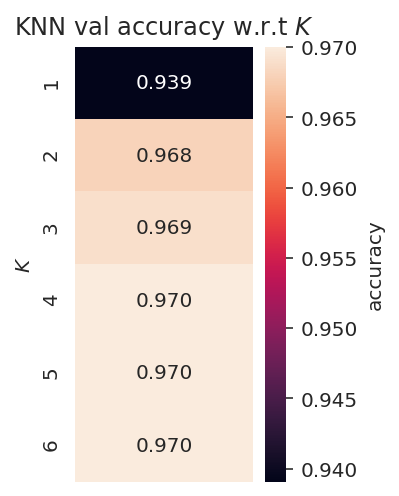

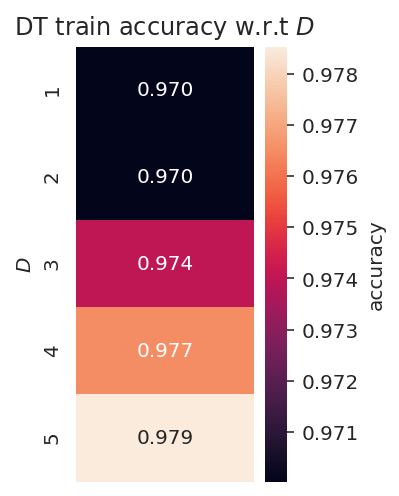

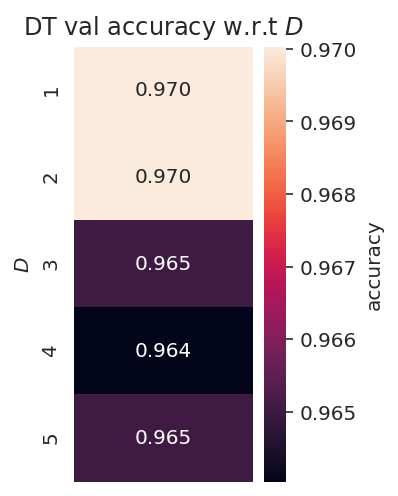

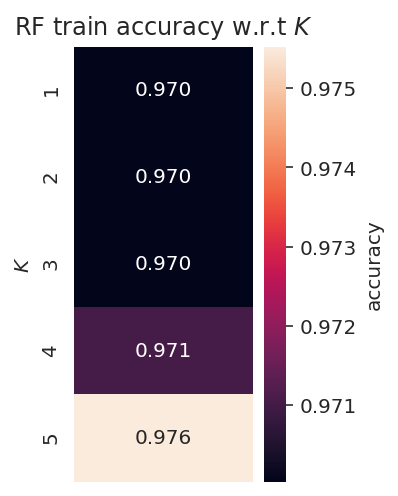

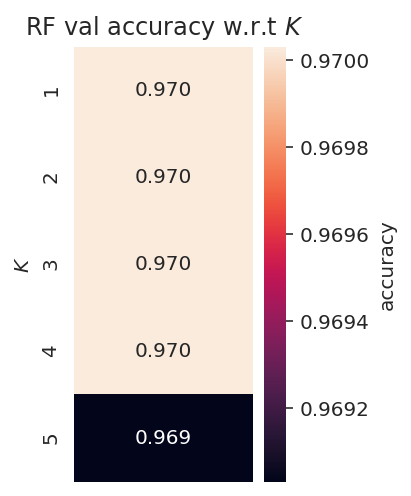

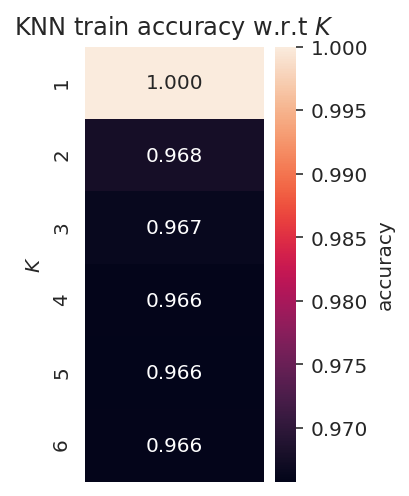

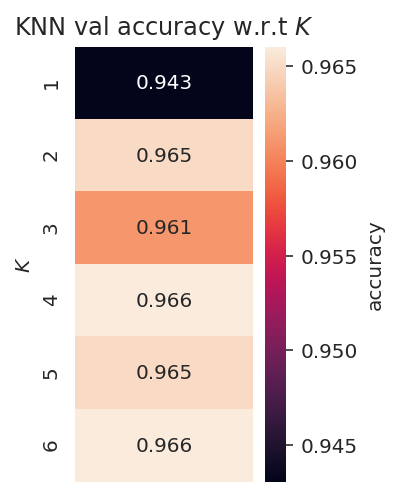

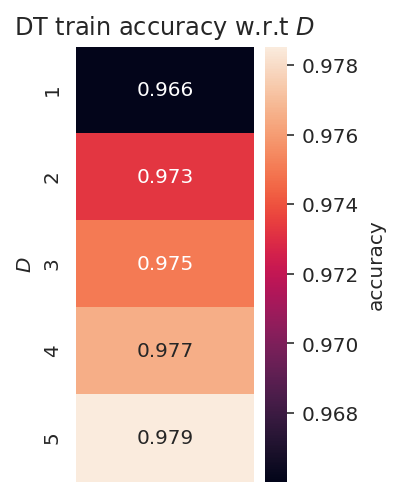

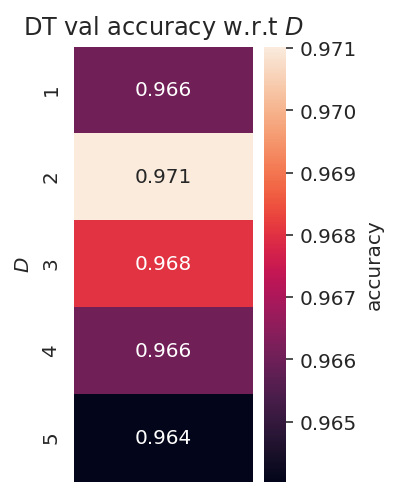

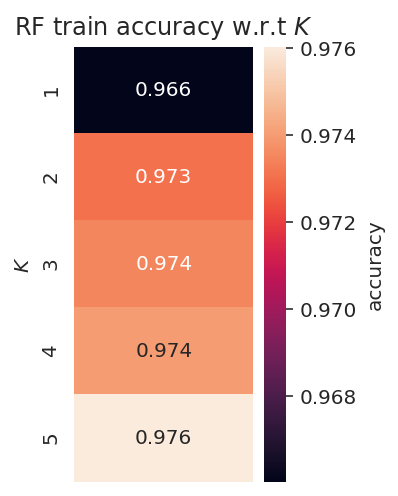

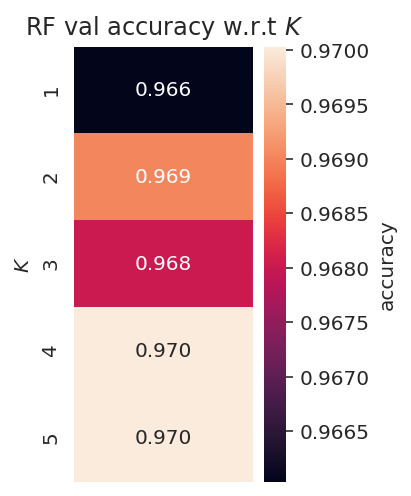

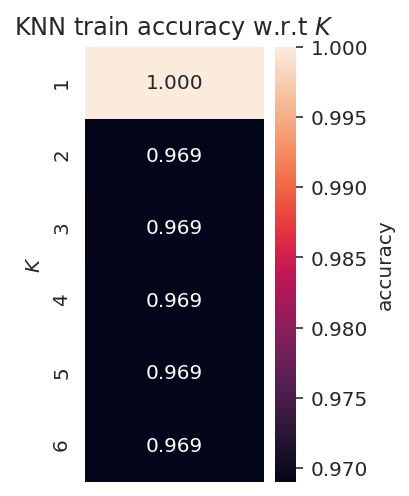

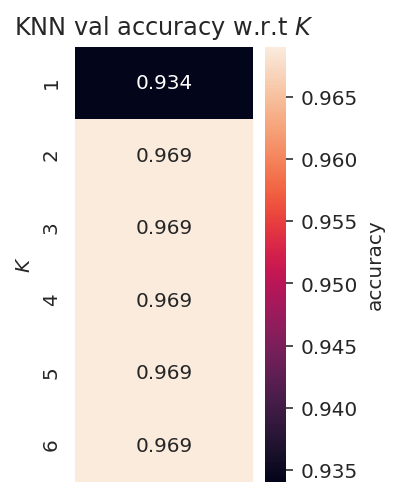

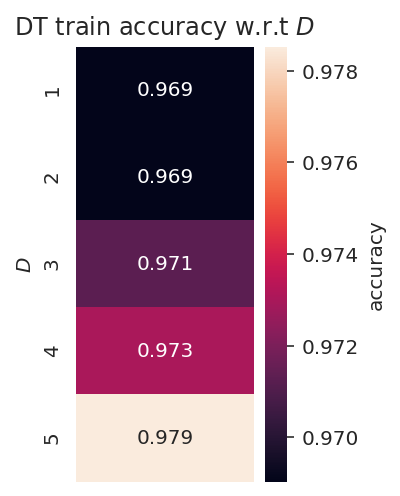

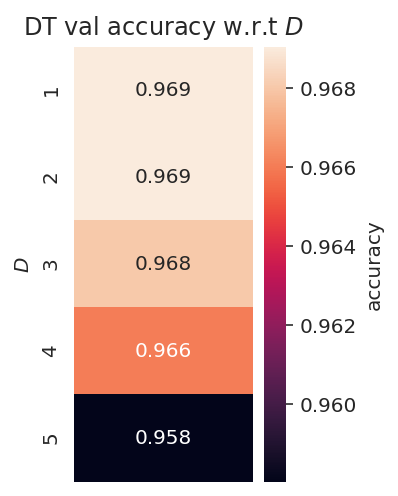

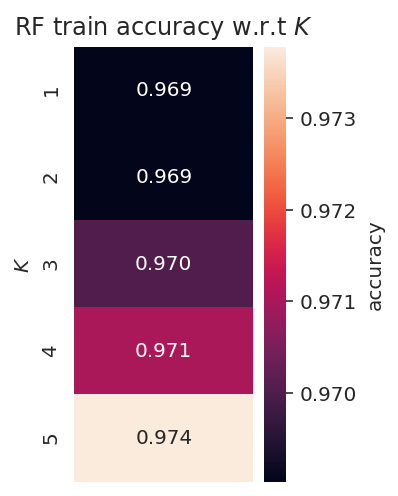

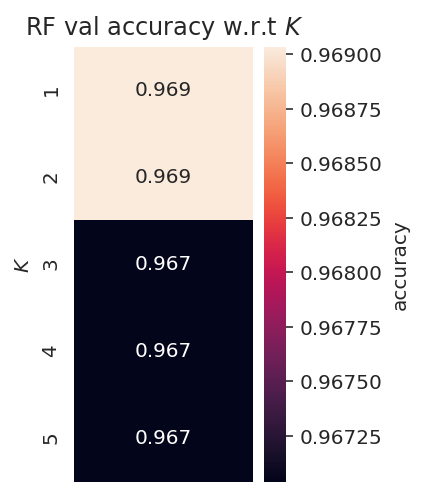

Test Accuracy Average for knn =  0.9662000000000001
Test Accuracy Average for Random Forest =  0.9661000000000002
Test Accuracy Average for Decision Tree =  0.9661000000000002
[[0.      0.9678  0.9682  0.9668  0.      0.      0.     ]
 [0.      0.96672 0.96728 0.96744 0.      0.      0.     ]
 [0.      0.9662  0.9661  0.9661  0.      0.      0.     ]]
############################
[[0.         0.96675832 0.96675832 0.96675832 0.         0.
  0.        ]
 [0.         0.96711309 0.96641344 0.96971194 0.         0.
  0.        ]
 [0.         0.96903121 0.96903121 0.96903121 0.         0.
  0.        ]]
############################
[[0. 6. 1. 1. 0. 0. 0.]
 [0. 4. 1. 5. 0. 0. 0.]
 [0. 2. 1. 1. 0. 0. 0.]]


In [9]:
#Split Data By 80/20, 50/50, 20/80
partitionVal = [0.8, 0.5, 0.2]
result_table = np.zeros((3,7))
result_table1 = np.zeros((3,7))
result_table2 = np.zeros((3,7))
for i, partition in enumerate(partitionVal):
    print("Partition: ", partition)
    knn_test_acc = []
    rand_forest_test_acc = []
    decision_tree_test_acc = []
    svm_test_acc = []
    
    NUM_TRIALS = 5
    for trial in range(NUM_TRIALS):
        #Mix up the data
        bankrupcy_data = bankrupcy_data.sample(frac=1).reset_index(drop=True) 
        #Find the point where to split the data
        breakNum = int(partition*len(bankrupcy_data)) 
        
        X_train_full = bankrupcy_data.loc[0:breakNum]
        X_train_val = X_train_full.drop("Bankrupt?", axis = 1)
        Y_train_val = X_train_full["Bankrupt?"]
        X_test_full = bankrupcy_data.loc[breakNum:]
        X_test= X_test_full.drop("Bankrupt?", axis = 1)
        Y_test_val = X_test_full["Bankrupt?"]
        
        #Call the svm classifier (Took Too Long For ALL Datasets)
        #test_acc,best_train0,C0 = svm_func()
        #svm_test_acc.append(test_acc)

        #Call the knn classifier
        test_acc,best_train1,C1 = knn_classifier()
        knn_test_acc.append(test_acc)

        #Call the Decision Tree classifier
        test_acc,best_train2,C2 = decision_Tree()
        decision_tree_test_acc.append(test_acc)

        #Call the Random Forest classifier
        test_acc,best_train3,C3 = rand_Forest()
        rand_forest_test_acc.append(test_acc)
             
        
    #result_table[i, 0] = sum(svm_test_acc)/NUM_TRIALS
    result_table[i, 1] = sum(knn_test_acc)/NUM_TRIALS
    result_table[i, 2] = sum(decision_tree_test_acc)/NUM_TRIALS
    result_table[i, 3] = sum(rand_forest_test_acc)/NUM_TRIALS
  
    
    #result_table1[i, 0] = best_train0
    result_table1[i, 1] = best_train1
    result_table1[i, 2] = best_train2
    result_table1[i, 3] = best_train3
    
    
    #result_table2[i, 0] = C0
    result_table2[i, 1] = C1
    result_table2[i, 2] = C2
    result_table2[i, 3] = C3
   
        
    #Average all test accuracies for all 3 trials
    print("Test Accuracy Average for knn = ", sum(knn_test_acc)/NUM_TRIALS)
    print("Test Accuracy Average for Random Forest = ", 
          sum(rand_forest_test_acc)/NUM_TRIALS)
    print("Test Accuracy Average for Decision Tree = ", 
          sum(decision_tree_test_acc)/NUM_TRIALS)
    #print("Test Accuracy Average for SVM = ", sum(svm_test_acc)/NUM_TRIALS)


    #y-axis: partition
    #x-axis: classifier
    print(result_table)
    print("############################")
    print(result_table1)
    print("############################")
    print(result_table2)

## **Students Performance Dataset**

This given dataset provides 8 various attributes that give us the necessary information to predict how a studnet might score on in math, reading, and writing. The reasoning behind using this dataset is for a basis for a real world scenario, where a schools want to see how students are doing based on their background.


In [29]:
students_data_preserved = pd.read_csv('StudentsPerformance.csv')
students_data = students_data_preserved #Temp for manipulation
students_data #preview of dataset

#Basic Cleanup
students_data.dropna(inplace=True)
students_data.shape
students_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [30]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [31]:
# Encoded each of the categorical features so it will be good for our testing
MultiColumnLabelEncoder(columns = ['gender','race/ethnicity', 
                                   'parental level of education', 
                                   'lunch', 
                                   'test preparation course']).fit_transform(students_data)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95
996,1,2,2,0,1,62,55,55
997,0,2,2,0,0,59,71,65
998,0,3,4,1,0,68,78,77


In [33]:
#Checking what data types we have in the dataset
print(students_data.dtypes)

#Need to change object to int for consistency
students_data["gender"] = students_data["gender"].astype(str).astype(float)
students_data["race/ethnicity"] = students_data["race/ethnicity"].astype(str).astype(int)
students_data["parental level of education"] = students_data["parental level of education"].astype(str).astype(int)
students_data["lunch"] = students_data["lunch"].astype(str).astype(int)
students_data["test preparation course"] = students_data["test preparation course"].astype(str).astype(int)
students_data.head()#Data preview
#Convert Data to a numpy Array
students_data = students_data.sample(n=1000).reset_index(drop=True)

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


ValueError: ignored

In [24]:
#Split Data By 80/20, 50/50, 20/80
partitionVal = [0.8, 0.5, 0.2]
result_table = np.zeros((3,7))
result_table1 = np.zeros((3,7))
result_table2 = np.zeros((3,7))
for i, partition in enumerate(partitionVal):
    print("Partition: ", partition)
    knn_test_acc = []
    rand_forest_test_acc = []
    decision_tree_test_acc = []
    svm_test_acc = []
    
    NUM_TRIALS = 5
    for trial in range(NUM_TRIALS):
        #Mix up the data
        students_data = students_data.sample(frac=1).reset_index(drop=True) 
        #Find the point where to split the data
        breakNum = int(partition*len(students_data)) 
        
        X_train_full = students_data.loc[0:breakNum]
        X_train_val = X_train_full.drop("gender", axis = 1)
        Y_train_val = X_train_full["gender"]
        X_test_full = students_data.loc[breakNum:]
        X_test= X_test_full.drop("gender", axis = 1)
        Y_test_val = X_test_full["gender"]
        
        #Call the svm classifier (Took Too Long For ALL Datasets)
        #test_acc,best_train0,C0 = svm_func()
        #svm_test_acc.append(test_acc)

        #Call the knn classifier
        test_acc,best_train1,C1 = knn_classifier()
        knn_test_acc.append(test_acc)

        #Call the Decision Tree classifier
        test_acc,best_train2,C2 = decision_Tree()
        decision_tree_test_acc.append(test_acc)

        #Call the Random Forest classifier
        test_acc,best_train3,C3 = rand_Forest()
        rand_forest_test_acc.append(test_acc)
             
        
    #result_table[i, 0] = sum(svm_test_acc)/NUM_TRIALS
    result_table[i, 1] = sum(knn_test_acc)/NUM_TRIALS
    result_table[i, 2] = sum(decision_tree_test_acc)/NUM_TRIALS
    result_table[i, 3] = sum(rand_forest_test_acc)/NUM_TRIALS
  
    
    #result_table1[i, 0] = best_train0
    result_table1[i, 1] = best_train1
    result_table1[i, 2] = best_train2
    result_table1[i, 3] = best_train3
    
    
    #result_table2[i, 0] = C0
    result_table2[i, 1] = C1
    result_table2[i, 2] = C2
    result_table2[i, 3] = C3
   
        
    #Average all test accuracies for all 3 trials
    print("Test Accuracy Average for knn = ", sum(knn_test_acc)/NUM_TRIALS)
    print("Test Accuracy Average for Random Forest = ", 
          sum(rand_forest_test_acc)/NUM_TRIALS)
    print("Test Accuracy Average for Decision Tree = ", 
          sum(decision_tree_test_acc)/NUM_TRIALS)
    #print("Test Accuracy Average for SVM = ", sum(svm_test_acc)/NUM_TRIALS)


    #y-axis: partition
    #x-axis: classifier
    print(result_table)
    print("############################")
    print(result_table1)
    print("############################")
    print(result_table2)

Partition:  0.8


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'group D'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'group B'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'group B'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The 

ValueError: ignored